In [1]:
import json, nltk, re, os, codecs, mpld3

import pandas as pd
from pandas.io.json import json_normalize
import pandas_profiling
import numpy as np

from matplotlib import pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set_style('darkgrid')

from sklearn import feature_extraction


ModuleNotFoundError: No module named 'mpld3'

In [3]:
def clean(data):
    with open(data) as f:
        d = json.load(f)
    #normalize json
    data_norm = json_normalize(d)
    #select colunms
    new_data = data_norm[['bereich.group', 'skill_summary', 'title', 'description']]
    
    #remove null
    new_data = new_data[pd.notnull(new_data['skill_summary'])]
    
    #remove square bracket from skill_summary
    new_data['skill_summary'] = new_data['skill_summary'].apply(', '.join)
    #remove empty values
    new_data = new_data[new_data['skill_summary'] != '']
    new_data = new_data[new_data['skill_summary'] != 'none']
    return new_data


In [4]:
df = clean('clean.json')
df.head()

,bereich.group,skill_summary,title,description
0,Data Science,"tableau, visualisierung",Business Intelligence Analyst (m/w) - Tableau ...,Business Intelligence Analyst (m/w) - Tableau ...
1,Development,", implementierung, java, ms sql, camel, apache...",Developer - Talend ESB oder Apache Camel (m/w)...,"Konzeption, Customizing sowie Softwareanpassun..."
4,Development,", windows, clients, ios, mobile devices, mobil...",IT-Mitarbeiter (m/w) 1st / 2nd Level Support /...,"Als Mitglied eines kleinen, dynamischen Teams ..."
5,Infrastructure,"dynamics ax 2009, dynamics crm 4.0, dynamics a...",Consultant für Microsoft Dynamics CRM (m/w),Über unseren Kunden: \n \n Unser Kunde ist e...
6,Development,"hibernate, java, deutsch, oracle 11g, oracle 1...",Java Senior Developer - Backend (f/m),Über unseren Kunden: \n \n Unser Kunde ist e...


In [65]:
pandas_profiling.ProfileReport(df)

/usr/local/lib/python3.5/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/lib/python3.5/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


Number of variables,5
Number of observations,6141
Total Missing (%),0.0%
Total size in memory,240.0 KiB
Average record size in memory,40.0 B
Numeric,1
Categorical,4
Boolean,0
Date,0
Text (Unique),0
Rejected,0


In [7]:
data = df.drop('bereich.group', 1)
data.shape

(6141, 3)

In [10]:
data = data.drop_duplicates()
data.to_csv('projectfinder.csv')

In [5]:
def get_json(data):
    with open(data) as f:
        d = json.load(f)
    #normalize json
    data_norm = json_normalize(d)
    
    
    #remove null
    data_norm = data_norm[pd.notnull(data_norm[['skill_summary',]])]
    
    #remove square bracket from skill_summary
    data_norm['skill_summary'] = data_norm['skill_summary'].apply(', '.join)
    #remove empty values
    data_norm = data_norm[data_norm['skill_summary'] != '']
    data_norm = data_norm[data_norm['skill_summary'] != 'none']
    return data_norm


In [7]:
# load nltk's English stopwords as variable called 'stopwords'
stopwords = nltk.corpus.stopwords.words('german')
print(stopwords[:10])

['aber', 'alle', 'allem', 'allen', 'aller', 'alles', 'als', 'also', 'am', 'an']


In [8]:
# load nltk's SnowballStemmer as variabled 'stemmer'
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer("german")

In [9]:
# here I define a tokenizer and stemmer which returns the set of stems in the text that it is passed

def tokenize_and_stem(text):
    # first tokenize by sentence, then by word to ensure that punctuation is caught as it's own token
    tokens = [word.lower() for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    filtered_tokens = []
    # filter out any tokens not containing letters (e.g., numeric tokens, raw punctuation)
    for token in tokens:
        if re.search('[a-zA-Z]', token):
            filtered_tokens.append(token)
    stems = [stemmer.stem(t) for t in filtered_tokens]
    return stems


def tokenize_only(text):
    # first tokenize by sentence, then by word to ensure that punctuation is caught as it's own token
    tokens = [word.lower() for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    filtered_tokens = []
    # filter out any tokens not containing letters (e.g., numeric tokens, raw punctuation)
    for token in tokens:
        if re.search('[a-zA-Z]', token):
            filtered_tokens.append(token)
    return filtered_tokens

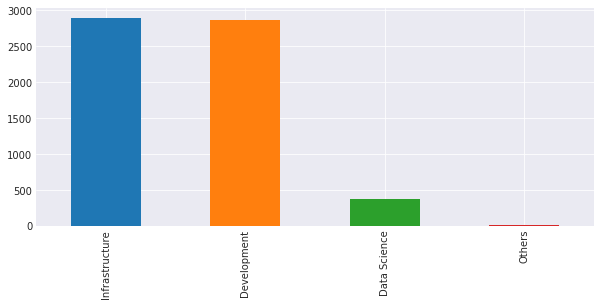

In [10]:
plt.figure(figsize=(10,4))
df['bereich.group'].value_counts().plot(kind='bar');

In [14]:
text = "here i am 12"
a = re.findall(r'[\d]', text)
' '.join(a)

'1 2'